## Setup

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
%matplotlib inline

## Numpy
#### Numpy有一個很基本但非常核心的功能叫做broadcast，在你對numpy的array做數學運算時，若兩個array維度或大小不一樣，他會自動broadcast成相同大小，以便進行運算，下禮拜可能會教pandas，pandas也是建立在numpy之上的關聯庫，所以pandas也會使用到numpy的broadcast

In [2]:
x = np.array([1, 2, 3, 4, 5, 6, 7])
y = 3
print(x*y)

[ 3  6  9 12 15 18 21]


#### 像以上的範例，他其實是將y broadcast成[3, 3, 3, 3, 3, 3, 3]，然後將x的每個元素分別成上對應的y元素

In [3]:
x = np.array([1, 2, 3, 4, 5, 6, 7])
y = np.array([3] * len(x))

print(f'x => {x}')
print(f'y => {y}')
print(f'x*y => {x*y}')

x => [1 2 3 4 5 6 7]
y => [3 3 3 3 3 3 3]
x*y => [ 3  6  9 12 15 18 21]


#### 因為numpy的這個特性，所以在做一些矩陣運算要特別小心，例如內積時一定要用np.dot()不能直接用*

In [4]:
x = np.array([[1, 2],[3, 4]])
y = np.array([[5, 6],[7, 8]])

print(x)
print()

print(y)
print()

print(x*y)
print()

print(np.dot(x, y))
print()

[[1 2]
 [3 4]]

[[5 6]
 [7 8]]

[[ 5 12]
 [21 32]]

[[19 22]
 [43 50]]



## Matplotlib

#### Matplotlib主要有兩種繪圖方式，第一種是直接用plt，第二種是用fig, ax分別設定，第一種比較簡單，適合快速出簡單的圖，第二種複雜一點，但能做出更多細緻的設定，兩種各有自己的優點

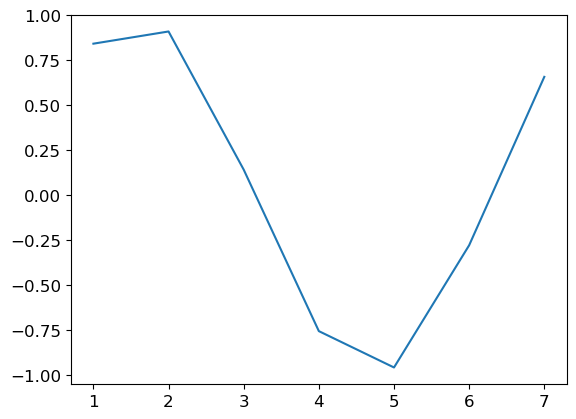

In [5]:
# 第一種 plt
x = [1, 2, 3, 4, 5, 6, 7]
y = np.sin(x)
plt.plot(x, y)
plt.show()

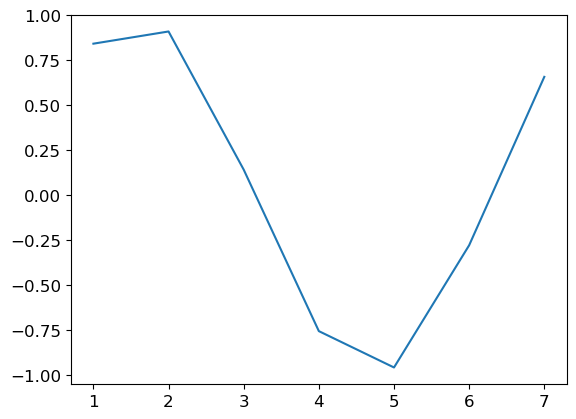

In [6]:
# 第二種 fig, ax，官方document推薦這種
x = [1, 2, 3, 4, 5, 6, 7]
y = np.sin(x)
fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

#### 下面這張圖是從官網抓來的，他顯示圖面中各個元素的名字，像是如果我想增加網格線(Grid)，就用ax.grid()

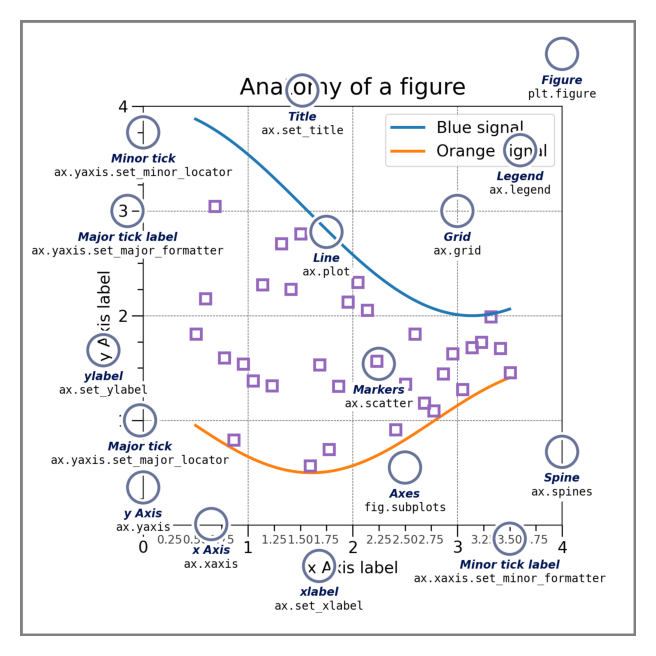

In [7]:
img = plt.imread("../data/anatomy.jpg")

plt.figure(figsize=(4, 4), dpi=200) # figure控制畫圖的畫布，figsize是畫布大小，dpi是解析度
plt.imshow(img)
plt.axis('off') # axis控制座標軸邊框
plt.show()

#### 實戰演練

In [8]:
# 資料準備，這邊只是整理畫圖用的資料，看不懂沒關係
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df = df.iloc[:, 2:]
df.head()

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


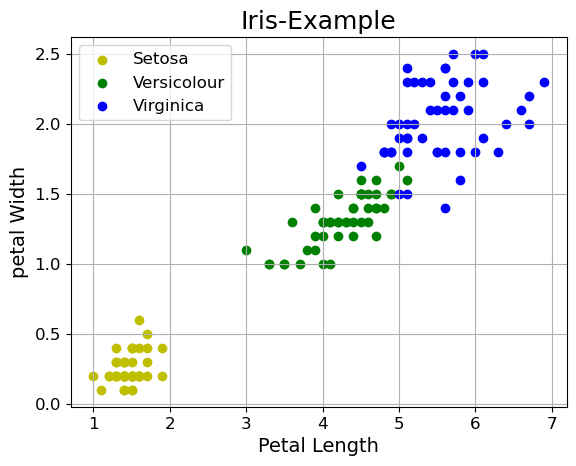

In [9]:
# 第一種plt
# 準備資料
setosa = df[df["target"] == 0]
versicolour = df[df["target"] == 1]
virginica = df[df["target"] == 2]

# 繪製散佈圖 label是用在圖例顯示的名稱
plt.scatter(setosa.iloc[:, 0], setosa.iloc[:, 1], color='y', label="Setosa")
plt.scatter(versicolour.iloc[:, 0], versicolour.iloc[:, 1], color='g', label="Versicolour")
plt.scatter(virginica.iloc[:, 0], virginica.iloc[:, 1], color='b', label="Virginica")

# 設定x,y軸標題和圖標題(這邊用plt和ax的語法不一樣要注意)
plt.title("Iris-Example", fontsize=18)
plt.xlabel("Petal Length")
plt.ylabel("petal Width")

# 設定左上角圖例和網格線
plt.legend(loc="upper left", fontsize=12)
plt.grid()

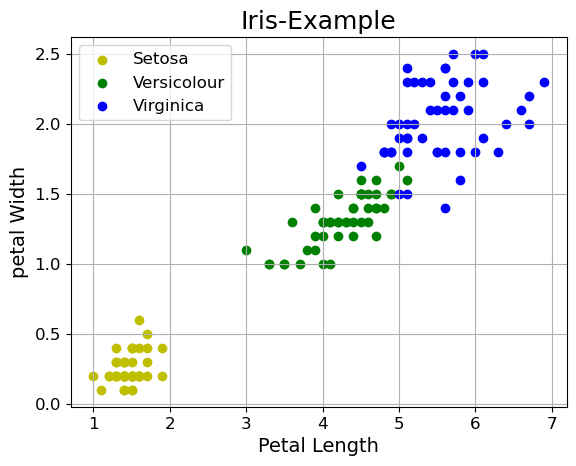

In [10]:
# 第二種fig, ax
# 準備資料
setosa = df[df["target"] == 0]
versicolour = df[df["target"] == 1]
virginica = df[df["target"] == 2]

# 繪製散佈圖 label是用在圖例顯示的名稱
fig, ax = plt.subplots()
ax.scatter(setosa.iloc[:, 0], setosa.iloc[:, 1], color='y', label="Setosa")
ax.scatter(versicolour.iloc[:, 0], versicolour.iloc[:, 1], color='g', label="Versicolour")
ax.scatter(virginica.iloc[:, 0], virginica.iloc[:, 1], color='b', label="Virginica")

# 設定x,y軸標題和圖標題(這邊用plt和ax的語法不一樣要注意)
ax.set_title("Iris-Example", fontsize=18)
ax.set_xlabel("Petal Length")
ax.set_ylabel("petal Width")

# 設定左上角圖例和網格線
ax.legend(loc="upper left", fontsize=12)
ax.grid()

#### Matplotlib支援Latex語法，顏色支援HEX色碼

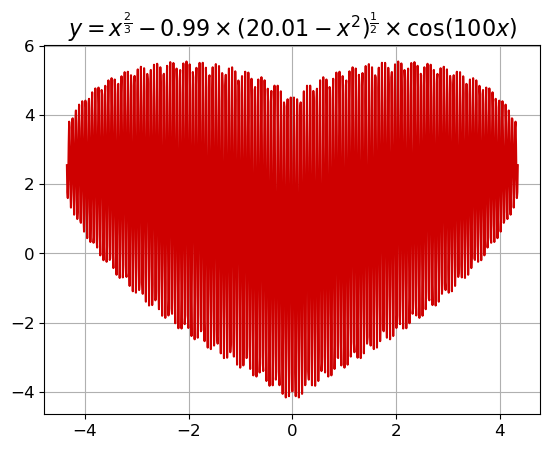

In [11]:
x = np.linspace(-4.35, 4.35, 1000)
y = np.abs(x)**(2/3)-0.99*np.abs(20.01-x**2)**(1/2)*np.cos(100*x)

fig, ax = plt.subplots()
ax.plot(x, y, color='#CE0000') # color使用HEX色碼(注意要加#)
ax.set_title(r'$y = x^{\frac{2}{3}}-0.99\times(20.01-x^2)^{\frac{1}{2}}\times\cos(100x)$', fontsize=16) # title使用Latex語法
ax.grid()
plt.show()

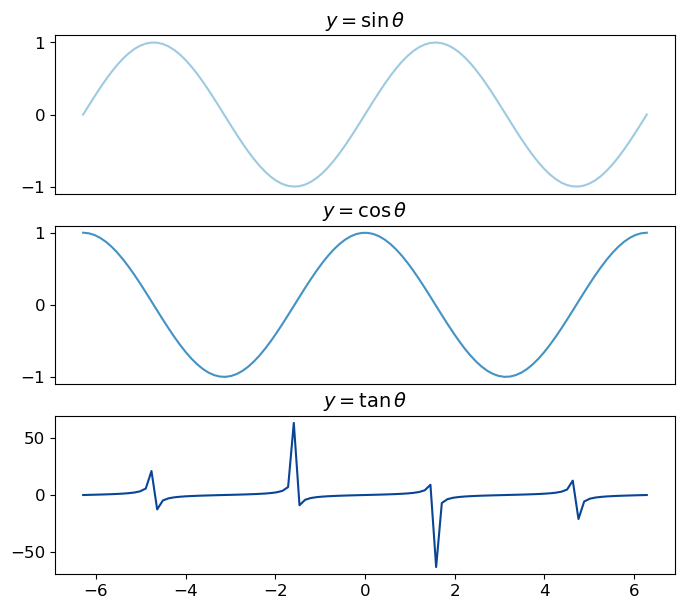

In [12]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)

fig, axs = plt.subplots(3, 1, figsize=(8, 7))

# plot的color使用HEX色碼(注意要加#)
# title使用Latex語法
plt.sca(axs[0]) #抓第一張圖的位置
plt.plot(x, np.sin(x), color='#9ecae1')
plt.title(r'$y = \sin\theta$', fontsize=14)
plt.xticks([]) #關閉ｘ軸刻度

plt.sca(axs[1]) #抓第二張圖的位置
plt.plot(x, np.cos(x), color='#4292c6')
plt.title(r'$y = \cos\theta$', fontsize=14)
plt.xticks([]) #關閉ｘ軸刻度

plt.sca(axs[2]) #抓第三張圖的位置
plt.plot(x, np.tan(x), color='#084594')
plt.title(r'$y = \tan\theta$', fontsize=14)

plt.show()

## Homework

#### Homework1

In [13]:
matrix = np.random.randint(0, 10000, 100).reshape(10, 10)
print("Random matrix => ")
print(matrix)

# 注意要用np的max()和min()
max_value = np.max(matrix)
min_value = np.min(matrix)

print()
print(f'Maximum => {max_value}')
print(f'Minimum => {min_value}')

Random matrix => 
[[1697 8592 1855 7231   18 5945 2093 4675 1453  648]
 [4667 3506 8301 9374 4707 5827 9882 7017 3024 8587]
 [9703 8298  834 3455 9056 3286 5037 3209 7714 2082]
 [1917 5523 7818 3369 3788 9956 4636  591 3506 7344]
 [2237 2268 1651 4028 4958 4736 3197 2654 7047 8375]
 [ 664 2335 5210  377 3130 4985 1535 1538  287 8184]
 [6399 1647 6027 5444 1500  459 3979 5614 7367 4952]
 [8915 2114 5370 9607 5416 3922 4783 3659 9197 5346]
 [4904 5164 7828  734 1617 2897 5433 3746 4919  771]
 [3540 7933 6262   76 6526 4136 8727 6557 7630 6590]]

Maximum => 9956
Minimum => 18


#### Homework2

In [15]:
n = int(input())
matrix = np.zeros((n, n))
print(f'{n}-dimensions matrix =>')

matrix[0, :] = 1 # 上
matrix[-1, :] = 1 # 下
matrix[:, 0] = 1 # 左
matrix[:, -1] = 1 # 右

print(matrix)

10-dimensions matrix =>
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


#### Homework3

#### 先分別畫出三張圖，確定能畫出正確的東西就好

In [16]:
x = [1, 2, 3, 4, 5, 6, 7]
y = np.sin(x)

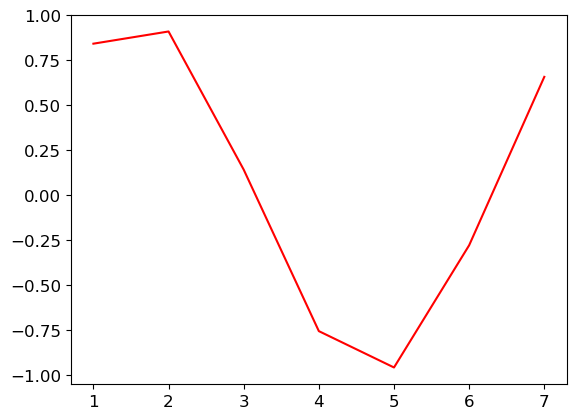

In [17]:
plt.plot(x, y, color='r')

plt.show()

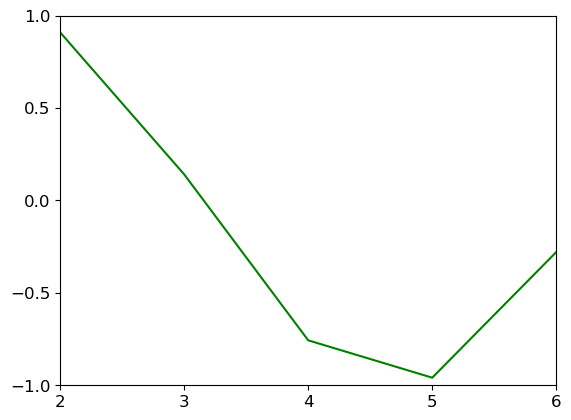

In [18]:
plt.plot(x, y, color='g')
plt.xlim(2, 6) #設置x範圍
plt.ylim(-1.0, 1.0) # 設置y範圍
plt.xticks([2, 3, 4, 5, 6]) # 設置x軸刻度
plt.yticks([-1.0, -0.5, 0.0, 0.5, 1.0]) #設置y軸刻度

plt.show()

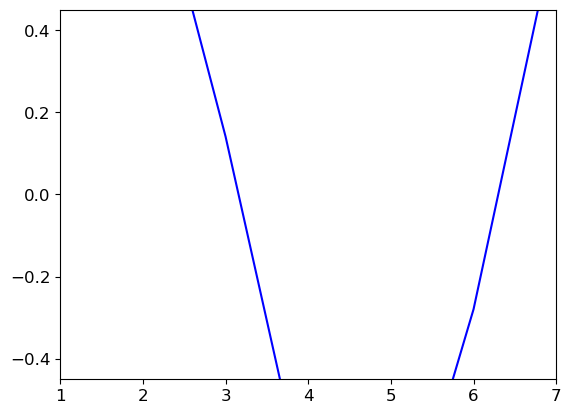

In [19]:
plt.plot(x, y, color='b')
plt.xlim(1, 7) #設置x範圍
plt.ylim(-0.45, 0.45) # 設置y範圍
plt.xticks([1, 2, 3, 4, 5, 6, 7]) # 設置x軸刻度
plt.yticks([-0.4, -0.2, 0.0, 0.2, 0.4]) #設置y軸刻度

plt.show()

#### 設置基本位置

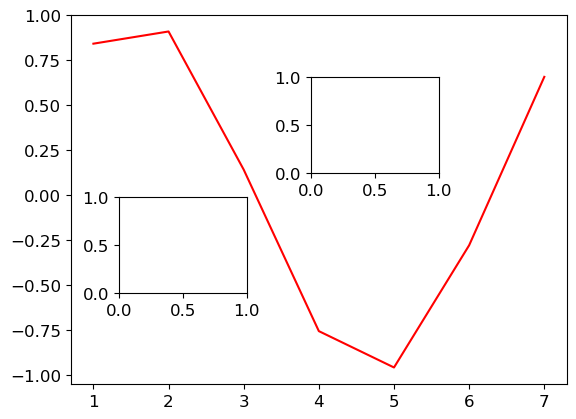

In [20]:
fig, ax = plt.subplots()

ax.plot(x, y, color='r') #底圖

ax1 = fig.add_axes([0.2, 0.3, 0.2, 0.2]) # 第一個小圖

ax2 = fig.add_axes([0.5, 0.55, 0.2, 0.2]) # 第二個小圖

plt.show()

#### 加上內容

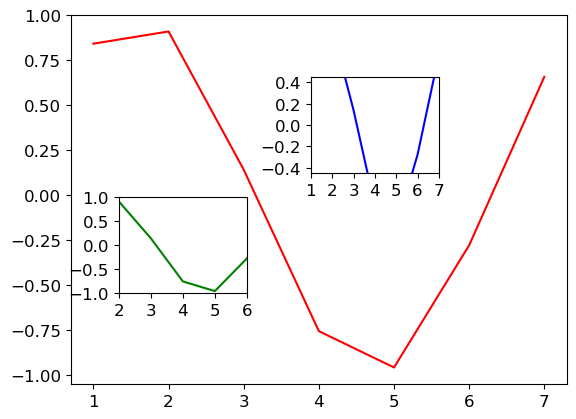

In [21]:
fig, ax = plt.subplots()

ax.plot(x, y, color='r') #底圖

ax1 = fig.add_axes([0.2, 0.3, 0.2, 0.2]) # 第一個小圖
ax1.plot(x, y, color="green")
ax1.set_xlim(2, 6)
ax1.set_ylim(-1.0, 1.0)
ax1.set_xticks([2, 3, 4, 5, 6])
ax1.set_yticks([-1.0, -0.5, 0.0, 0.5, 1.0])

ax2 = fig.add_axes([0.5, 0.55, 0.2, 0.2]) # 第二個小圖
ax2.plot(x, y, color="blue")
ax2.set_xlim(1, 7)
ax2.set_ylim(-0.45, 0.45)
ax2.set_xticks([1, 2, 3, 4, 5, 6, 7])
ax2.set_yticks([-0.4, -0.2, 0.0, 0.2, 0.4])

plt.show()

#### 多一些細節設定

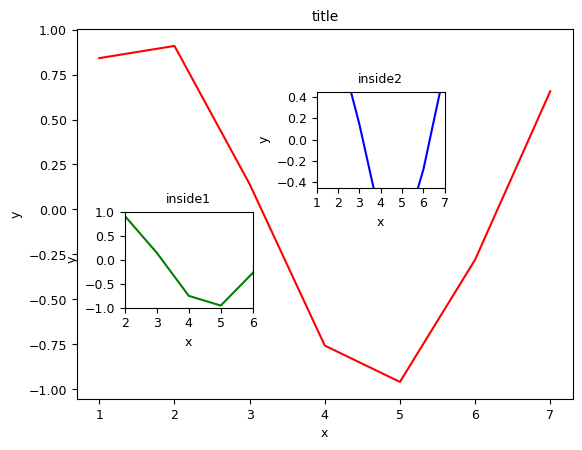

In [22]:
#設置座標軸字體大小，”整個notebook“都會生效
mpl.rc('axes', labelsize=9)
mpl.rc('xtick', labelsize=9)
mpl.rc('ytick', labelsize=9)

fig, ax = plt.subplots()

ax.plot(x, y, color='r') #底圖
ax.set_title("title", fontsize=10)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax1 = fig.add_axes([0.2, 0.3, 0.2, 0.2]) # 第一個小圖
ax1.plot(x, y, color="green")
ax1.set_xlim(2, 6)
ax1.set_ylim(-1.0, 1.0)
ax1.set_xticks([2, 3, 4, 5, 6])
ax1.set_yticks([-1.0, -0.5, 0.0, 0.5, 1.0])
ax1.set_title("inside1", fontsize=9)
ax1.set_xlabel("x")
ax1.set_ylabel("y")

ax2 = fig.add_axes([0.5, 0.55, 0.2, 0.2]) # 第二個小圖
ax2.plot(x, y, color="blue")
ax2.set_xlim(1, 7)
ax2.set_ylim(-0.45, 0.45)
ax2.set_xticks([1, 2, 3, 4, 5, 6, 7])
ax2.set_yticks([-0.4, -0.2, 0.0, 0.2, 0.4])
ax2.set_title("inside2", fontsize=9)
ax2.set_xlabel("x")
ax2.set_ylabel("y")

plt.show()